# Линейная регрессия. Однофакторный дисперсионный анализ
### Задача 1

Даны значения величины заработной платы заемщиков банка `salary` и значения их поведенческого кредитного скоринга `scoring`:

In [1]:
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Возьмём в качестве признака значение `salary`, а в качестве целевой переменной — `scoring`.

* Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
* Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии.
* Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
* Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
* Постройте для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента.

#### Решение

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

plt.style.use('seaborn-whitegrid')

In [3]:
x = np.array(salary)
y = np.array(scoring)

$y = b_0 + b x$

#### 1.1) Формулы для парной регрессии

$b = \dfrac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - {\overline{x}}^2}, \:\:
b_0 = \overline{y} - b {\overline{x}}.$

In [4]:
b = ((x * y).mean() - y.mean() * x.mean()) / ((x ** 2).mean() - x.mean() ** 2)

In [5]:
b0 = y.mean() - b * x.mean()

In [6]:
print(b0, b)

444.1773573243596 2.620538882402765


Получаем: $y = 444.18 + 2.62 \cdot x$

#### 1.2) Метод наименьших квадратов

$y = X \cdot b$

$(X \cdot b - y)^\top \cdot (X \cdot b - y) \rightarrow \min_b$

$b = (X^\top X)^{-1} \cdot X^\top \cdot y$

In [7]:
def lin_reg_coefs(x, y):
    X = pd.DataFrame({'x0': np.ones(x.shape[0]),
                      'x1': x})
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    return XTX_inv.dot(X.T).dot(y)

In [8]:
B = lin_reg_coefs(x, y)
B

array([444.17735732,   2.62053888])

Аналогичный результат: $y = 444.18 + 2.62 \cdot x$

#### 2) График

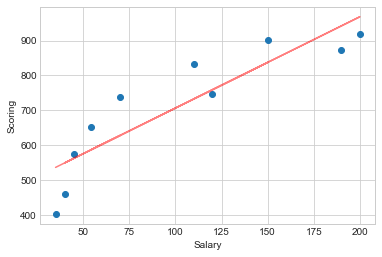

In [9]:
ox = x
oy = b0 + b * x

plt.scatter(x, y)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('Salary')
plt.ylabel('Scoring');

#### 3.1) Коэффициент детерминации

In [10]:
y_pred = b0 + b * x

In [11]:
R2 = y_pred.var() / y.var()
R2

0.7876386635293678

#### 3.2) Средняя ошибка аппроксимации
$\overline{A} = \dfrac{1}{n} \displaystyle\sum_{i=1}^{n} \Bigl| {{\dfrac{y_i - z_i}{y_i}} \Bigr|}$

In [12]:
np.abs((y - y_pred) / y).mean()

0.11469251843561709

#### 4) Оценка значимости уравнения линейной регрессии с помощью F-критерия Фишера

$H_0$ состоит в том, что все коэффициенты регрессии равны нулю. Соответствующая статистика:

$T = \dfrac{R^2}{1 - R^2} \cdot \dfrac{n - k - 1}{k}$

In [13]:
n = x.shape[0]  # число наблюдений
k1 = 1  # число факторов
k2 = n - k1 - 1

T = (R2 / (1 - R2)) * (k2 / k1)
T

29.67164085966437

Критическое значение

In [14]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714

$T > F_{crit}$. Нулевая гипотеза отвергается и уравнение регрессии признаётся статистически значимым.

#### 5) доверительные интервалы для коэффициентов регрессии с помощью t-статистики Стьюдента

In [15]:
def standard_error_slope(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента наклона.
    """
    
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

In [16]:
s_slope = standard_error_slope(x, y, y_pred)
s_slope

0.48108279568516005

Зададим уровень доверия $p = 0.95 \Rightarrow \alpha = 0.05$.

In [17]:
alpha = 0.05

t = stats.t.ppf(1 - alpha / 2, n - 2)
t

2.3060041350333704

Доверительный интервал для параметра $b$:

In [18]:
(b - t * s_slope, b + t * s_slope)

(1.5111599662593718, 3.729917798546158)

Считаем для $b_0$

In [19]:
def standard_error_intercept(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента сдвига.
    """
    
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

In [20]:
s_intercept = standard_error_intercept(x, y, y_pred)
s_intercept

56.46649755068153

Доверительный интервал для параметра $b_0$:

In [21]:
(b0 - t * s_intercept, b0 + t * s_intercept)

(313.9653804816363, 574.3893341670829)

### Задача 2

Допустим, первые 5 клиентов из предыдущего задания проживают в Москве, а остальные — в Санкт-Петербурге. Влияет ли этот фактор на значение их кредитного скоринга?

#### Решение

In [22]:
y1, y2 = np.split(y, 2)
n1 = n2 = n / 2

In [23]:
y.mean(), y1.mean(), y2.mean()

(709.9, 645.4, 774.4)

Найдём значения $S_F^2$ и $S_{res}^2$:

In [24]:
S2_F = n1 * (y1.mean() - y.mean()) ** 2 + n2 * (y2.mean() - y.mean()) ** 2

S2_res = ((y1 - y1.mean()) ** 2).sum() + ((y2 - y2.mean()) ** 2).sum()

S2_F, S2_res

(41602.5, 263086.39999999997)

Проверим, что $S^2 = S_F^2 + S_{res}^2:$

In [25]:
S2_F + S2_res, ((y - y.mean()) ** 2).sum()

(304688.89999999997, 304688.9000000001)

Запишем оценки дисперсий:

In [26]:
k = 2

k1 = k - 1
k2 = n - k

sigma2_F = S2_F / k1
sigma2_res = S2_res / k2

sigma2_F, sigma2_res

(41602.5, 32885.799999999996)

Значение статистики $T$:

In [27]:
T = sigma2_F / sigma2_res
T

1.2650596914169643

Зафиксируем уровень значимости $\alpha = 0.05$. Для него найдём критическое значение $F_{crit}$:

In [28]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714

Видим, что $T < F_{crit}$, поэтому, заключаем, что фактор города не влияет на скоринг.

### Задача 3

Посчитать коэффициенты линейной регрессии для Квартета Энскомба.

#### Решение

In [29]:
anscombe_dataset = pd.read_csv('anscombe_dataset.csv', index_col='id')
anscombe_dataset

,x1,y1,x2,y2,x3,y3,x4,y4
id,,,,,,,,
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56


In [30]:
B = []
for i in range(1, 5):
    B.append(lin_reg_coefs(anscombe_dataset[f'x{i}'], anscombe_dataset[f'y{i}']))
B

[array([3.00009091, 0.50009091]),
 array([3.00090909, 0.5       ]),
 array([3.00245455, 0.49972727]),
 array([3.00172727, 0.49990909])]

Коэффициенты практически одинаковые

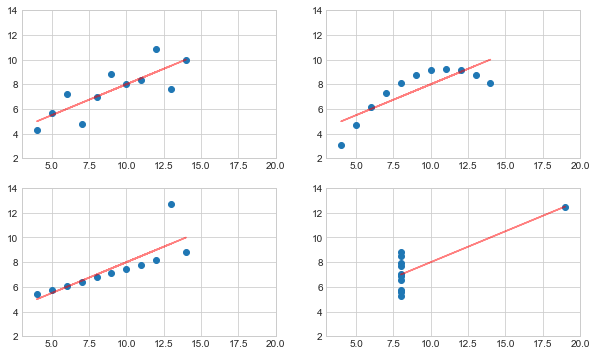

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(10, 6)

ax1, ax2, ax3, ax4 = axes.flatten()

for i, ax in enumerate(axes.flatten()):
    x = anscombe_dataset[f'x{i + 1}']
    y = anscombe_dataset[f'y{i + 1}']
    
    ox = x
    oy = B[i][0] + B[i][1] * x

    ax.scatter(x, y)
    ax.plot(ox, oy, color='red', alpha=0.5)
    
    ax.set_xlim(3, 20)
    ax.set_ylim(2, 14)